## 配合速限

### 先照之前的，讀取資料

In [1]:
import tqdm
import tarfile
import pandas
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import PIL
import gzip
from urllib.request import urlopen
%matplotlib inline
matplotlib.style.use('ggplot')

# progress bar
tqdm.tqdm.pandas()

# 檔案名稱格式
filename_format="M06A_{year:04d}{month:02d}{day:02d}.tar.gz".format
xz_filename_format="xz/M06A_{year:04d}{month:02d}{day:02d}.tar.xz".format
csv_format = "M06A/{year:04d}{month:02d}{day:02d}/{hour:02d}/TDCS_M06A_{year:04d}{month:02d}{day:02d}_{hour:02d}0000.csv".format

# 設定欄位名稱
M06A_fields = ['VehicleType',
               'DetectionTime_O','GantryID_O',
               'DetectionTime_D','GantryID_D ',
               'TripLength', 'TripEnd', 'TripInformation']
import datetime
# 用來解析時間格式
def strptime(x):
    return datetime.datetime(int(x[:4]), int(x[5:7]), int(x[8:10]), 
                             int(x[11:13]), int(x[14:16]), int(x[17:19]) )

def parse_tripinfo(tripinfo):
    split1 = tripinfo.split("; ")    
    return [(strptime(t), t[20:]) for t in split1]

In [2]:
speed_limit_url = "http://tisvcloud.freeway.gov.tw/roadlevel_info.xml.gz"
speed_data = gzip.decompress(urlopen(speed_limit_url).read()).decode('utf8')

In [3]:
from bs4 import BeautifulSoup
speed_data_soup = BeautifulSoup(speed_data, "xml")

In [4]:
route_info = pandas.DataFrame([x.attrs for x in speed_data_soup.Infos.find_all('Info')])
route_info

,endlocationpoint,fromkm,locationpath,roadsection,roadtype,routeid,sourceid,speedlimit,startlocationpoint,tokm
0,168,0K+000,166,國道1號(基隆端到基隆交流道),1,nfb0001,nfb,100,167,1K+100
1,169,1K+100,166,國道1號(基隆交流道到八堵交流道),1,nfb0003,nfb,100,168,2K+600
2,11585,2K+600,166,國道1號(八堵交流道到大華系統交流道),1,nfb0005,nfb,100,169,5K+000
3,170,5K+000,166,國道1號(大華系統交流道到五堵交流道),1,nfb0419,nfb,100,11585,6K+800
4,172,6K+800,166,國道1號(五堵交流道到汐止交流道),1,nfb0007,nfb,100,170,10K+500
5,173,10K+500,166,國道1號(汐止交流道到汐止系統交流道),1,nfb0011,nfb,100,172,11K+500
6,174,11K+500,166,國道1號(汐止系統交流道到高架汐止端),1,nfb0013,nfb,100,173,14K+000
7,175,14K+000,166,國道1號(高架汐止端到東湖交流道),1,nfb0015,nfb,100,174,15K+200
8,176,15K+200,166,國道1號(東湖交流道到內湖交流道),1,nfb0017,nfb,100,175,16K+800
9,177,16K+800,166,國道1號(內湖交流道到圓山交流道),1,nfb0019,nfb,100,176,23K+200


In [5]:
route_info = route_info.query("roadtype=='1'")[["fromkm","tokm","locationpath","speedlimit"]]
route_info

,fromkm,tokm,locationpath,speedlimit
0,0K+000,1K+100,166,100
1,1K+100,2K+600,166,100
2,2K+600,5K+000,166,100
3,5K+000,6K+800,166,100
4,6K+800,10K+500,166,100
5,10K+500,11K+500,166,100
6,11K+500,14K+000,166,100
7,14K+000,15K+200,166,100
8,15K+200,16K+800,166,100
9,16K+800,23K+200,166,100


In [6]:
set(route_info.locationpath)

{'113',
 '121',
 '128',
 '135',
 '143',
 '147',
 '154',
 '166',
 '28',
 '490',
 '4969',
 '5104'}

### 參考資料
http://61.57.40.123/RDS/20161129LocationTable.xlsx

In [7]:
tmc_data = pandas.read_excel("http://61.57.40.123/RDS/20161129LocationTable.xlsx", sheetname="TMC")
tmc_data.head(10)

,VERSION NR,TABLE,LOCATION CODE,(SUB)TYPE,ROAD NAME,FIRST NAME,SECOND NAME,AREA REFERENCE,LINEAR REFERENCE,NEGATIVE OFFSET,POSITIVE OFFSET,INTERSECTION REFS,LATITUDE,LONGITUDE,CROAD_NAME,CFIRST_NAME,CSECOND_NAME,IOTVersion
0,1,9,28,L1.1,National Highway No. 3,Jijin IC.,linbianduan,1879.0,NaN,NaN,NaN,NaN,NaN,NaN,國3,基金交流道,林邊交流道,1.1
1,1,9,29,P1.3,National Highway No. 3,Jijin IC.,NaN,1888.0,28.0,NaN,30.0,"4708, 4970",25.13986,121.71454,國3,基金交流道,NaN,1.1
2,1,9,30,P1.3,National Highway No. 3,Madong SIC.,NaN,1888.0,28.0,29.0,31.0,4092,25.12538,121.69746,國3,瑪東系統交流道,NaN,1.1
3,1,9,31,P3.3,National Highway No. 3,Cidu T.S.,NaN,1888.0,28.0,30.0,32.0,NaN,25.11466,121.68934,國3,七堵收費站,NaN,1.1
4,1,9,32,P1.1,National Highway No. 3,Sijhih SIC.,NaN,1899.0,28.0,31.0,33.0,173,25.07338,121.64591,國3,汐止系統交流道,NaN,1.1
5,1,9,33,P1.3,National Highway No. 3,Sintaiwu Rd. IC.,NaN,1899.0,28.0,32.0,34.0,"2815, 2768, 5175",25.05753,121.63980,國3,新台五路交流道/樟樹一路,NaN,1.1
6,1,9,34,P1.3,National Highway No. 3,Nangang IC.,NaN,1899.0,28.0,33.0,35.0,2922,25.04331,121.62475,國3,南港交流道,NaN,1.1
7,1,9,35,P1.3,National Highway No. 3,Nangang SIC.,NaN,1895.0,28.0,34.0,4427.0,155,25.03534,121.62012,國3,南港系統交流道,NaN,1.1
8,1,9,36,P1.3,National Highway No. 3,Mujha IC.,NaN,1895.0,28.0,4427.0,37.0,"146, 402",25.00205,121.59492,國3,無路名道路/木柵路五段,NaN,1.1
9,1,9,37,P3.4,National Highway No. 3,Mujha Rest Area,NaN,1895.0,28.0,36.0,38.0,NaN,24.97633,121.57060,國3,木柵休息站,NaN,1.1


In [8]:
road_name={}
for n in set(route_info.locationpath):
    CROAD_NAME = set(tmc_data[tmc_data["LINEAR REFERENCE"]==int(n)].CROAD_NAME)
    print(n, CROAD_NAME)
    road_name[int(n)]=list(CROAD_NAME)[0]

28 {'國3'}
143 {'國3甲'}
490 {'環東大道'}
113 {'國10'}
5104 {'國6'}
166 {'國1'}
135 {'國2'}
147 {'汐止五股高架段'}
128 {'國4'}
154 {'國5'}
4969 {'台 2己'}
121 {'國8'}


In [9]:
# 把 km 表示法轉成數字 單位是 km/10
def convert_km(s):
    a,b = s.split("K+")
    return int(a)*10+int(b)/100
route_info['fromkm'] = route_info.fromkm.apply(convert_km)
route_info['tokm'] = route_info.tokm.apply(convert_km)

In [10]:
# 用來簡化速限範圍，把連續而且速限相同的區間連成一塊
def simplify(points, speeds):
    # remove duplicates
    r_points, r_speeds = [], []
    last_s = None
    for p, s in zip(points,speeds):
        if s == last_s:
            continue
        r_points.append(p)
        r_speeds.append(s)
        last_s = s
    return r_points, r_speeds

# 另外一個作法是用 numpy 方式
def np_simplify(points, speeds):
    speeds = np.array([-1]+list(speeds))
    idx = speeds[:-1] != speeds[1:]
    return np.array(points)[idx], speeds[1:][idx]

In [11]:
# 速限分析， binary search 用的
southbound_speedlimit = {}
northbound_speedlimit = {}
def __process_speedlimit(lower_km, higher_km, speedlimit):
    assert list(lower_km[1:])==list(higher_km[:-1])  #假設區段全部連在一起
    nodes = list(lower_km)
    speeds = map(int, speedlimit)  
    nodes, speeds = simplify(nodes,speeds)
    nodes = nodes + list(higher_km[-1:]+0.5)
    return nodes, speeds
    

for n in set(route_info.locationpath):
    info = route_info[route_info.locationpath==n]
    n = int(n)
    print(n, road_name[n])
    
    # southbound
    infos = info.query("fromkm<tokm").sort_values("fromkm")
    nodes, speeds = __process_speedlimit(infos.fromkm, infos.tokm, infos.speedlimit)
    print("south", nodes, speeds)
    southbound_speedlimit[n]=(nodes, [110]+speeds+[110]) # 超出範圍時，保守估計
    
    # northbound
    infon = info.query("fromkm>tokm").sort_values("fromkm")
    nodes, speeds = __process_speedlimit(infon.tokm, infon.fromkm, infon.speedlimit)
    print("north", nodes, speeds)
    northbound_speedlimit[n]=(nodes, [110]+speeds+[110])


28 國3
south [0.0, 359.0, 430.0, 4315.5] [90, 100, 110]
north [0.0, 359.0, 506.0, 4315.5] [90, 100, 110]
143 國3甲
south [0.0, 56.5] [80]
north [0.0, 56.5] [80]
490 環東大道
south [0.0, 14.5] [70]
north [0.0, 14.5] [70]
113 國10
south [0.0, 338.5] [100]
north [0.0, 338.5] [100]
5104 國6
south [0.0, 373.5] [90]
north [0.0, 373.5] [90]
166 國1
south [0.0, 3744.5] [100]
north [0.0, 3744.5] [100]
135 國2
south [0.0, 204.5] [100]
north [0.0, 204.5] [100]
147 汐止五股高架段
south [130.80000000000001, 705.5] [100]
north [130.80000000000001, 705.5] [100]
128 國4
south [0.0, 172.09999999999999] [100]
north [0.0, 172.09999999999999] [100]
154 國5
south [0.0, 147.0, 543.5] [80, 90]
north [0.0, 147.0, 543.5] [80, 90]
4969 台 2己
south [0.0, 40.299999999999997] [50]
north [0.0, 40.299999999999997] [50]
121 國8
south [0.0, 155.5] [100]
north [0.0, 155.5] [100]


### Q
印出 `route_info` 檢查看看上面的速限是否正確？


### 計算一下每個偵測站的速限

In [12]:
# 偵測站資料
node_data_url = "http://www.freeway.gov.tw/Upload/DownloadFiles/%e5%9c%8b%e9%81%93%e8%a8%88%e8%b2%bb%e9%96%80%e6%9e%b6%e5%ba%a7%e6%a8%99%e5%8f%8a%e9%87%8c%e7%a8%8b%e7%89%8c%e5%83%b9%e8%a1%a8104.09.04%e7%89%88.csv"
node_data = pandas.read_csv(urlopen(node_data_url), encoding='big5', header=1)
# 簡單清理資料
node_data = node_data[node_data["方向"].apply(lambda x:x in 'NS')]
node_data.head(5)

,方向,編號,收費區 設定里程,小車牌價,交流道(起),交流道(迄),Unnamed: 6,緯度(北緯),Unnamed: 8,經度(東經)
0,S,01F-000.5S,1.1,1.3,基隆端(基隆港),基隆(長庚醫院),N,25.11878611,E,121.7317639
1,S,01F-001.7S,1.2,1.4,基隆(長庚醫院),八堵,N,25.10956667,E,121.7259056
2,S,01F-002.9S,2.8,3.3,八堵,大華系統(連接台62),N,25.10311111,E,121.7173694
3,S,01F-006.1S,1.8,2.1,大華系統(連接台62),五堵,N,25.08839444,E,121.6934833
4,S,01F-009.9S,3.7,4.4,五堵,汐止&汐止系統(連接國3),N,25.07626389,E,121.6594778


In [13]:
# 手工寫的對照表
nodeprefix_to_routeid={
 '01F': 166,  # 國道一號
 '01H': 147, #汐止五股高架段
 '03F': 28, # 國道三號
 '03A': 143, #國三甲
 '05F': 154, #國道五號
}

In [14]:
# 清理一下 node_data 的編號格式
node_data["編號"] = node_data["編號"].apply(lambda x:x[:3]+x[4:7]+x[8:])
node_data.index = node_data.編號
node_data.head(10)

,方向,編號,收費區 設定里程,小車牌價,交流道(起),交流道(迄),Unnamed: 6,緯度(北緯),Unnamed: 8,經度(東經)
編號,,,,,,,,,,
01F0005S,S,01F0005S,1.1,1.3,基隆端(基隆港),基隆(長庚醫院),N,25.11878611,E,121.7317639
01F0017S,S,01F0017S,1.2,1.4,基隆(長庚醫院),八堵,N,25.10956667,E,121.7259056
01F0029S,S,01F0029S,2.8,3.3,八堵,大華系統(連接台62),N,25.10311111,E,121.7173694
01F0061S,S,01F0061S,1.8,2.1,大華系統(連接台62),五堵,N,25.08839444,E,121.6934833
01F0099S,S,01F0099S,3.7,4.4,五堵,汐止&汐止系統(連接國3),N,25.07626389,E,121.6594778
01F0147S,S,01F0147S,3.7,4.4,汐止&汐止系統(連接國3),東湖,N,25.06564444,E,121.6135194
01F0155S,S,01F0155S,2.1,2.5,東湖,內湖(南京東、成功路),N,25.06475278,E,121.6059028
01F0182S,S,01F0182S,5.9,7,內湖(南京東、成功路),圓山(建國北路),N,25.06898611,E,121.5802306
01F0248S,S,01F0248S,2.1,2.5,圓山(建國北路),台北(重慶北、士林),N,25.07763056,E,121.5166028


In [15]:
# 計算
from bisect import bisect
def node_code_to_speedlimit(node_code):
    if node_code[3]=='R':
        return 110
    prefix = node_code[:3]
    routeid = nodeprefix_to_routeid[prefix]
    speedlimit_table = southbound_speedlimit if node_code[-1]=='S' else northbound_speedlimit
    location = int(node_code[3:7])
    nodes, speeds = speedlimit_table[routeid]
    i = bisect(nodes, location)
    return speeds[i]
node_data['速限'] = node_data.編號.apply(node_code_to_speedlimit)

## Q
查看一下結果
比方國道五號的速限可以 
```python
node_data[node_data["編號"].str.startswith('05')]
```

In [16]:
## 順便存一下檔案
node_data.to_json('node_data.json')

pandas.DataFrame(
    {k:southbound_speedlimit[v] + northbound_speedlimit[v]
     for k,v in nodeprefix_to_routeid.items() if v in southbound_speedlimit},
     index=["south_loc", "south_speed", "north_loc", "north_speed"]).to_json("speedlimit.json")
    

## 依照速限來找更多的超速

In [17]:
# 這個改了一點， SpeedInfo 這個 named tuple 同時紀錄了區段的起始時間和兩端點
from collections import namedtuple
SpeedInfo = namedtuple("SpeedInfo", ["speed", "time","loc1", "loc2"])

def compute_speed(trip):
    rtn = []
    for (t1,n1), (t2,n2) in zip(trip[:-1], trip[1:]):
        if n1[:3] != n2[:3] or n1[-1]!=n2[-1]:
            continue
        if n1[3]=='R' or n2[3]=='R': 
            continue
        km1 = int(n1[3:-1])/10
        km2 = int(n2[3:-1])/10
        hr_delta = (t2-t1).total_seconds()/60/60
        speed = abs(km2-km1)/hr_delta
        rtn.append(SpeedInfo(speed, t1, n1, n2))
    return rtn 

In [18]:
# 打開剛才下載的檔案試試
data_config ={"year":2016, "month":12, "day":18}
tar = tarfile.open(filename_format(**data_config), 'r')

# 如果沒有下載，可以試試看 xz 檔案
#data_dconfig ={"year":2016, "month":11, "day":18}
#tar = tarfile.open(xz_filename_format(**data_config), 'r')

In [19]:
csvs = (tar.extractfile(csv_format(hour=hr, **data_config)) for hr in tqdm.trange(24))

data = pandas.concat([pandas.read_csv(csv, names=M06A_fields) for csv in csvs], ignore_index=True)
print("資料大小", data.shape)

# 檢查異常的資料
print("異常資料數:", data[data.TripEnd == 'N'].shape[0])

# 去除異常資料
data = data[data.TripEnd == 'Y']

# 只保留 TripInformation 和 VehicleType
data = data[['VehicleType', "TripInformation"]]

100%|██████████| 24/24 [00:34<00:00,  1.36s/it]


資料大小 (3350606, 8)
異常資料數: 0


In [20]:
data['Trip'] = data.TripInformation.progress_apply(parse_tripinfo)
data['Speed'] = data.Trip.progress_apply(compute_speed)

100%|██████████| 3350606/3350606 [00:44<00:00, 75513.17it/s]


In [21]:
# 要怎麼由 SpeedInfo 來判斷是否超速?
# 如果兩個測速站的速限不同，保守起見，取大的
# 方法一
def is_speeding(info):
    speedlimit = node_data["速限"][[info.loc1, info.loc2]].max()
    return info.speed > speedlimit + 10

# 方法二 先轉成 dict
speedlimit_lookup = node_data.速限.to_dict()
def is_speeding(info):
    speedlimit = max(speedlimit_lookup[info.loc1], speedlimit_lookup[info.loc2])
    return info.speed > speedlimit + 10

speeding_idx = data.Speed.progress_apply(lambda l:any(is_speeding(x) for x in l))
data[speeding_idx].head(10)

100%|██████████| 3350606/3350606 [00:25<00:00, 133583.43it/s]


,VehicleType,TripInformation,Trip,Speed
0,31,2016-12-18 00:31:53+03F2079S; 2016-12-18 00:32...,"[(2016-12-18 00:31:53, 03F2079S), (2016-12-18 ...","[(123.93442622950788, 2016-12-18 00:31:53, 03F..."
4,31,2016-12-18 00:35:55+01F0633S; 2016-12-18 00:37...,"[(2016-12-18 00:35:55, 01F0633S), (2016-12-18 ...","[(106.28571428571458, 2016-12-18 00:35:55, 01F..."
8,31,2016-12-18 00:26:36+01F1621S; 2016-12-18 00:28...,"[(2016-12-18 00:26:36, 01F1621S), (2016-12-18 ...","[(115.52238805970178, 2016-12-18 00:26:36, 01F..."
9,31,2016-12-18 00:18:25+01F3525S; 2016-12-18 00:20...,"[(2016-12-18 00:18:25, 01F3525S), (2016-12-18 ...","[(99.69230769230833, 2016-12-18 00:18:25, 01F3..."
10,31,2016-12-18 00:22:43+01H0163S; 2016-12-18 00:24...,"[(2016-12-18 00:22:43, 01H0163S), (2016-12-18 ...","[(120.00000000000001, 2016-12-18 00:22:43, 01H..."
15,31,2016-12-18 00:28:54+01F3525S; 2016-12-18 00:31...,"[(2016-12-18 00:28:54, 01F3525S), (2016-12-18 ...","[(102.8571428571435, 2016-12-18 00:28:54, 01F3..."
16,31,2016-12-18 00:34:49+01F0928N; 2016-12-18 00:37...,"[(2016-12-18 00:34:49, 01F0928N), (2016-12-18 ...","[(104.72727272727268, 2016-12-18 00:34:49, 01F..."
25,31,2016-12-18 00:35:27+01F3696N; 2016-12-18 00:36...,"[(2016-12-18 00:35:27, 01F3696N), (2016-12-18 ...","[(102.85714285714286, 2016-12-18 00:35:27, 01F..."
27,31,2016-12-18 00:20:36+01F0248S; 2016-12-18 00:21...,"[(2016-12-18 00:20:36, 01F0248S), (2016-12-18 ...","[(133.95348837209283, 2016-12-18 00:20:36, 01F..."
28,31,2016-12-18 00:21:33+01F0509S; 2016-12-18 00:22...,"[(2016-12-18 00:21:33, 01F0509S), (2016-12-18 ...","[(121.76470588235317, 2016-12-18 00:21:33, 01F..."


In [22]:
num_total = data.shape[0]
num_valid = data.Speed.apply(bool).sum() 
num_overspeed = speeding_idx.sum()
num_total, num_valid, num_overspeed, num_overspeed/num_total, num_overspeed/num_valid

(3350606, 2347875, 350227, 0.10452646476488134, 0.14916765159985093)

## Q
在 ```data[speeding_idx].head(10)``` 中， 那些路段超速?

## Q
上面的 `num_valid` 可以用一個 `numpy` 的函數來計算
```python
num_valid = np.count_nonzero(data.Speed)
```
也可以用 `np.sum` 來算 `num_overspeed`

## 分組來統計

In [23]:
# 加入是否超速的欄位
data['is_speeding'] = speeding_idx
# 依照車輛種類分組
grouped = data.groupby('VehicleType')
# 計算非零的個數
num_total_by_type = grouped.agg(np.count_nonzero)

# 所以 Speed 就是 num_valid, is_speeding 就是 num_overspeeding
num_total_by_type

,TripInformation,Trip,Speed,is_speeding
VehicleType,,,,
5,41664,41664,29314,360
31,2655612,2655612,1846568,295118
32,545414,545414,397076,51961
41,68296,68296,48861,1705
42,39620,39620,26056,1083


In [24]:
# 依照車種計算超速比例
ratio_speeding_valid = lambda x: x.is_speeding/x.Speed
ratios = num_total_by_type.apply(ratio_speeding_valid, axis=1)
ratios

VehicleType
5     0.012281
31    0.159820
32    0.130859
41    0.034895
42    0.041564
dtype: float64

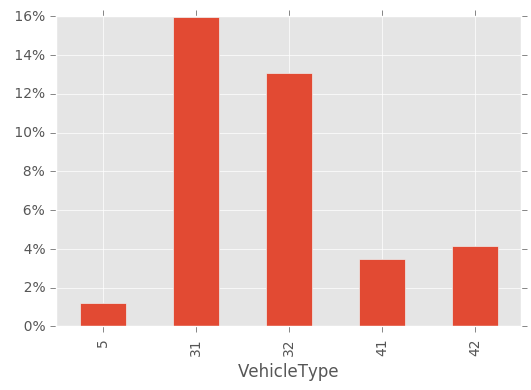

In [26]:
ax = ratios.plot.bar()
ticks = np.vectorize('{:3.0f}%'.format)(100*ax.get_yticks())
ax.set_yticklabels(ticks);